In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from transformers import pipeline
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import pickle
import pandas as pd
import numpy as np
from transformers import pipeline, AutoTokenizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import re

# Suppress warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('ggplot')

c:\Users\mahmod\anaconda3\envs\ai_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../dataset/Reviews.csv')
df = df.head(1000)  # Limit to first 1000 reviews
print(f"Dataset shape: {df.shape}")

Dataset shape: (1000, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1000 non-null   int64 
 1   ProductId               1000 non-null   object
 2   UserId                  1000 non-null   object
 3   ProfileName             1000 non-null   object
 4   HelpfulnessNumerator    1000 non-null   int64 
 5   HelpfulnessDenominator  1000 non-null   int64 
 6   Score                   1000 non-null   int64 
 7   Time                    1000 non-null   int64 
 8   Summary                 1000 non-null   object
 9   Text                    1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [5]:
# Convert scores to sentiment labels
def score_to_sentiment(score):
    if score >= 4:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Score'].apply(score_to_sentiment)

In [6]:
# Prepare data for traditional ML models
X = df['Text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [8]:
# Initialize traditional ML models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(C=0.5),
    'Random Forest': RandomForestClassifier(n_estimators=100,max_depth=10)
}

In [9]:

from sklearn.model_selection import cross_val_score


# Store results
ml_results = {} 
for name, model in models.items():
    # Cross-validation to handle overfitting
    cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')  # 5-fold Cross-validation
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")# بيقيم النموذج عبر خمس اشياء من افضل من ان هو شايفهم مجموعه واحده
# Store results


# Train and evaluate traditional ML models
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    predictions = model.predict(X_test_tfidf)
    
    accuracy = accuracy_score(y_test, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')
    
    ml_results[name] = {
        'predictions': predictions,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

Logistic Regression Cross-Validation Accuracy: 0.7700 ± 0.0025
SVM Cross-Validation Accuracy: 0.7700 ± 0.0025
Random Forest Cross-Validation Accuracy: 0.7700 ± 0.0025

Logistic Regression Results:
Accuracy: 0.8200
Precision: 0.6724
Recall: 0.8200
F1 Score: 0.7389

SVM Results:
Accuracy: 0.8200
Precision: 0.6724
Recall: 0.8200
F1 Score: 0.7389

Random Forest Results:
Accuracy: 0.8200
Precision: 0.6724
Recall: 0.8200
F1 Score: 0.7389


In [10]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

ml_results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)


    train_preds = model.predict(X_train_tfidf)
    train_accuracy = accuracy_score(y_train, train_preds)
    train_precision, train_recall, trainf1,_ = precision_recall_fscore_support(y_train, train_preds, average='weighted')


    test_preds = model.predict(X_test_tfidf)
    test_accuracy = accuracy_score(y_test, test_preds)
    test_precision, test_recall, testf1,_  = precision_recall_fscore_support(y_test, test_preds, average='weighted')
 
    ml_results[name] = {
        'train_metrics': {
            'accuracy': train_accuracy,
            'precision': train_precision,
            'recall': train_recall,
            'f1': trainf1
        },
        'test_metrics': {
            'accuracy': test_accuracy,
            'precision': test_precision,
            'recall': test_recall,
            'f1': testf1,
            'predictions': test_preds
        }
    }

    print(f"\n{name} - Training vs Testing:")
    print(f"Train Accuracy: {train_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f}")
    print(f"Train F1 Score: {trainf1:.4f} | Test F1 Score: {testf1:.4f}")


Logistic Regression - Training vs Testing:
Train Accuracy: 0.7950 | Test Accuracy: 0.8200
Train F1 Score: 0.7226 | Test F1 Score: 0.7389

SVM - Training vs Testing:
Train Accuracy: 0.7700 | Test Accuracy: 0.8200
Train F1 Score: 0.6699 | Test F1 Score: 0.7389

Random Forest - Training vs Testing:
Train Accuracy: 0.7700 | Test Accuracy: 0.8200
Train F1 Score: 0.6699 | Test F1 Score: 0.7389


In [11]:
# Prepare data for RNN and LSTM
max_words = 5000 
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len)

In [12]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train_pad, X_test_pad, y_train_enc, y_test_enc = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

In [13]:

# RNN Model
rnn_model = Sequential([
    Embedding(max_words, 100, input_length=max_len),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

In [14]:
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train RNN
rnn_history = rnn_model.fit(X_train_pad, y_train_enc, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7328 - loss: 0.8164 - val_accuracy: 0.8000 - val_loss: 0.6300
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7609 - loss: 0.7230 - val_accuracy: 0.8000 - val_loss: 0.6305
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7672 - loss: 0.6420 - val_accuracy: 0.8000 - val_loss: 0.6295
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8359 - loss: 0.4716 - val_accuracy: 0.7312 - val_loss: 0.7435
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9281 - loss: 0.2514 - val_accuracy: 0.7500 - val_loss: 0.7802


In [16]:


# Evaluate RNN
rnn_pred = np.argmax(rnn_model.predict(X_test_pad), axis=1)
rnn_accuracy = accuracy_score(y_test_enc, rnn_pred)
rnn_precision, rnn_recall, rnn_f1, _ = precision_recall_fscore_support(y_test_enc, rnn_pred, average='weighted')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [17]:
ml_results['RNN'] = {
    'predictions': le.inverse_transform(rnn_pred),
    'accuracy': rnn_accuracy,
    'precision': rnn_precision,
    'recall': rnn_recall,
    'f1': rnn_f1
}

print("\nRNN Results:")
print(f"Accuracy: {rnn_accuracy:.4f}")
print(f"Precision: {rnn_precision:.4f}")
print(f"Recall: {rnn_recall:.4f}")
print(f"F1 Score: {rnn_f1:.4f}")



RNN Results:
Accuracy: 0.7750
Precision: 0.7250
Recall: 0.7750
F1 Score: 0.7464


In [18]:

# LSTM Model
lstm_model = Sequential([
    Embedding(max_words, 100, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

In [19]:

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:

# Train LSTM
lstm_history = lstm_model.fit(X_train_pad, y_train_enc, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7453 - loss: 0.8972 - val_accuracy: 0.8000 - val_loss: 0.6361
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7625 - loss: 0.7038 - val_accuracy: 0.8000 - val_loss: 0.6194
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7625 - loss: 0.6507 - val_accuracy: 0.8000 - val_loss: 0.6151
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7672 - loss: 0.4999 - val_accuracy: 0.7875 - val_loss: 0.5871
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8625 - loss: 0.3135 - val_accuracy: 0.7688 - val_loss: 0.9703


In [21]:
# Evaluate LSTM
lstm_pred = np.argmax(lstm_model.predict(X_test_pad), axis=1)
lstm_accuracy = accuracy_score(y_test_enc, lstm_pred)
lstm_precision, lstm_recall, lstm_f1, _ = precision_recall_fscore_support(y_test_enc, lstm_pred, average='weighted')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [22]:

ml_results['LSTM'] = {
    'predictions': le.inverse_transform(lstm_pred),
    'accuracy': lstm_accuracy,
    'precision': lstm_precision,
    'recall': lstm_recall,
    'f1': lstm_f1
}

print("\nLSTM Results:")
print(f"Accuracy: {lstm_accuracy:.4f}")
print(f"Precision: {lstm_precision:.4f}")
print(f"Recall: {lstm_recall:.4f}")
print(f"F1 Score: {lstm_f1:.4f}")


LSTM Results:
Accuracy: 0.8400
Precision: 0.7788
Recall: 0.8400
F1 Score: 0.7925


In [23]:
# VADER Sentiment Analysis
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mahmod\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
vader_pred = [vader_sentiment(text) for text in X_test]
vader_accuracy = accuracy_score(y_test, vader_pred)
vader_precision, vader_recall, vader_f1, _ = precision_recall_fscore_support(y_test, vader_pred, average='weighted')

ml_results['VADER'] = {
    'predictions': vader_pred,
    'accuracy': vader_accuracy,
    'precision': vader_precision,
    'recall': vader_recall,
    'f1': vader_f1
}
print("\nVADER Results:")
print(f"Accuracy: {vader_accuracy:.4f}")
print(f"Precision: {vader_precision:.4f}")
print(f"Recall: {vader_recall:.4f}")
print(f"F1 Score: {vader_f1:.4f}")




VADER Results:
Accuracy: 0.8500
Precision: 0.8218
Recall: 0.8500
F1 Score: 0.8329


In [25]:
# RoBERTa and DistilBERT
# Initialize RoBERTa pipeline with a fine-tuned sentiment model
roberta_model = "cardiffnlp/twitter-roberta-base-sentiment-latest"
roberta_tokenizer = AutoTokenizer.from_pretrained(roberta_model)
roberta_pipeline = pipeline("sentiment-analysis", model=roberta_model, tokenizer=roberta_tokenizer, max_length=512, truncation=True)
distilbert_model = "distilbert-base-uncased-finetuned-sst-2-english"
distilbert_tokenizer = AutoTokenizer.from_pretrained(distilbert_model)
distilbert_pipeline = pipeline("sentiment-analysis", model=distilbert_model, tokenizer=distilbert_tokenizer, max_length=512, truncation=True)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0
Device set to use cuda:0


In [26]:

def roberta_sentiment(text):
    result = roberta_pipeline(text[:512])[0]
    label = result['label']
    if 'positive' in label.lower():
        return 'Positive'
    elif 'negative' in label.lower():
        return 'Negative'
    else:
        return 'Neutral'

In [27]:
def distilbert_sentiment(text):
    result = distilbert_pipeline(text[:512])[0] # diStilbert max tokenize is 512 
    return 'Positive' if result['label'] == 'POSITIVE' else 'Negative'



In [28]:
roberta_pred = df['Text'].apply(roberta_sentiment)
distilbert_pred = df['Text'].apply(distilbert_sentiment)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [29]:
import pandas as pd
import numpy as np
from transformers import pipeline, AutoTokenizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import re

# Text preprocessing function
def preprocess_text(text):
    # Remove URLs, HTML tags, and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

# RoBERTa sentiment prediction function
def roberta_sentiment(text):
    # Preprocess text
    cleaned_text = preprocess_text(text)
    if not cleaned_text:
        return 'Neutral'  # Default for empty text
    # Get prediction
    result = roberta_pipeline(cleaned_text)
    label = result[0]['label'].lower()
    # Map RoBERTa labels to dataset labels
    label_mapping = {
        'positive': 'Positive',
        'neutral': 'Neutral',
        'negative': 'Negative'
    }
    return label_mapping.get(label, 'Neutral')  # Default to Neutral if label is unexpected

# Evaluate RoBERTa on the test set
roberta_pred = [roberta_sentiment(text) for text in X_test]
roberta_accuracy = accuracy_score(y_test, roberta_pred)
roberta_precision, roberta_recall, roberta_f1, _ = precision_recall_fscore_support(y_test, roberta_pred, average='weighted')

# Update ml_results
ml_results['RoBERTa'] = {
    'predictions': roberta_pred,
    'accuracy': roberta_accuracy,
    'precision': roberta_precision,
    'recall': roberta_recall,
    'f1': roberta_f1
}

# Print results
print("\nRoBERTa Results :")
print(f"Accuracy: {roberta_accuracy:.4f}")
print(f"Precision: {roberta_precision:.4f}")
print(f"Recall: {roberta_recall:.4f}")
print(f"F1 Score: {roberta_f1:.4f}")




RoBERTa Results :
Accuracy: 0.8450
Precision: 0.8794
Recall: 0.8450
F1 Score: 0.8605


In [30]:



# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

# DistilBERT sentiment prediction function
def distilbert_sentiment(text):
    cleaned_text = preprocess_text(text)
    if not cleaned_text:
        return 'Neutral'
    result = distilbert_pipeline(cleaned_text)
    label = result[0]['label'].lower()
    label_mapping = {
        'positive': 'Positive',
        'negative': 'Negative',
        'neutral': 'Neutral'
    }
    return label_mapping.get(label, 'Negative')

# Evaluate DistilBERT on the test set
distilbert_pred = [distilbert_sentiment(text) for text in X_test]
distilbert_accuracy = accuracy_score(y_test, distilbert_pred)
distilbert_precision, distilbert_recall, distilbert_f1, _ = precision_recall_fscore_support(y_test, distilbert_pred, average='weighted')

# Update ml_results
ml_results['DistilBERT'] = {
    'predictions': distilbert_pred,
    'accuracy': distilbert_accuracy,
    'precision': distilbert_precision,
    'recall': distilbert_recall,
    'f1': distilbert_f1
}

# Print results
print("\nDistilBERT Results :")
print(f"Accuracy: {distilbert_accuracy:.4f}")
print(f"Precision: {distilbert_precision:.4f}")
print(f"Recall: {distilbert_recall:.4f}")
print(f"F1 Score: {distilbert_f1:.4f}")




DistilBERT Results :
Accuracy: 0.7050
Precision: 0.8173
Recall: 0.7050
F1 Score: 0.7303


Logistic Regression structure: ['train_metrics', 'test_metrics']
Logistic Regression test_metrics: ['accuracy', 'precision', 'recall', 'f1', 'predictions']
SVM structure: ['train_metrics', 'test_metrics']
SVM test_metrics: ['accuracy', 'precision', 'recall', 'f1', 'predictions']
Random Forest structure: ['train_metrics', 'test_metrics']
Random Forest test_metrics: ['accuracy', 'precision', 'recall', 'f1', 'predictions']
Logistic Regression - y_true unique values: ['Negative' 'Neutral' 'Positive']
Logistic Regression - y_pred unique values: ['Positive']
SVM - y_true unique values: ['Negative' 'Neutral' 'Positive']
SVM - y_pred unique values: ['Positive']
Random Forest - y_true unique values: ['Negative' 'Neutral' 'Positive']
Random Forest - y_pred unique values: ['Positive']


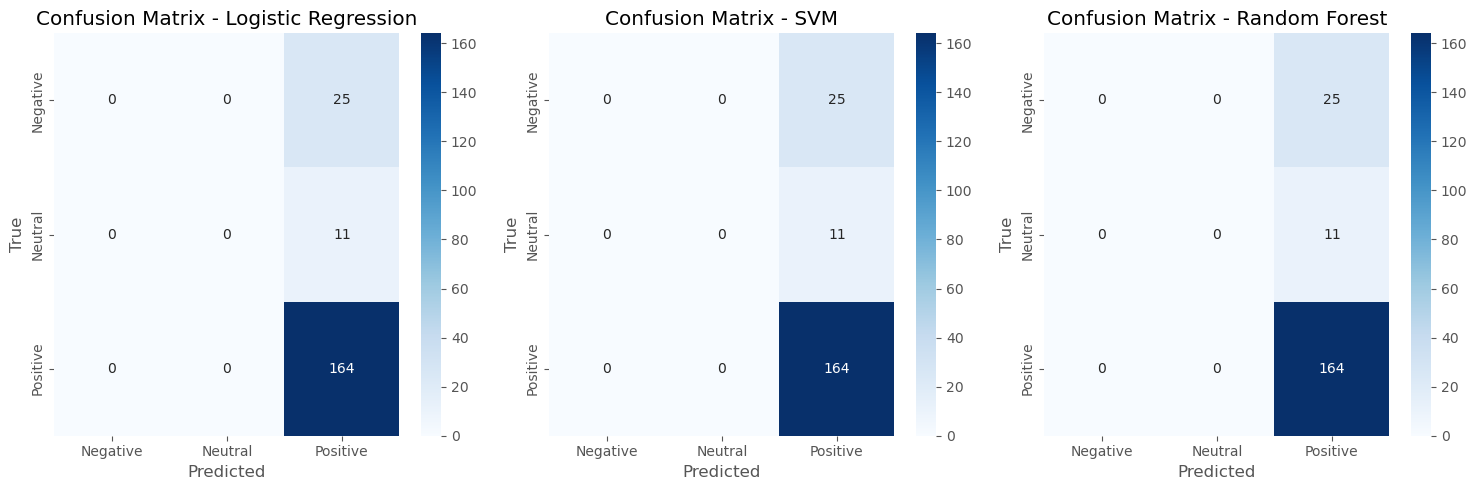

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Define class labels
class_labels = ['Negative', 'Neutral', 'Positive']

# Selected models (traditional ML models)
selected_models = ['Logistic Regression', 'SVM', 'Random Forest']

# Debugging: Print the structure of ml_results for each model
for model_name in selected_models:
    print(f"{model_name} structure: {list(ml_results[model_name].keys())}")
    if 'test_metrics' in ml_results[model_name]:
        print(f"{model_name} test_metrics: {list(ml_results[model_name]['test_metrics'].keys())}")

# Plot confusion matrices for selected models
plt.figure(figsize=(15, 5))
for i, model_name in enumerate(selected_models, 1):
    # Get true labels
    y_true = y_test
    
    # Get predictions from test_metrics
    if 'test_metrics' in ml_results[model_name] and 'predictions' in ml_results[model_name]['test_metrics']:
        y_pred = ml_results[model_name]['test_metrics']['predictions']
    else:
        print(f"Warning: No predictions found for {model_name}. Skipping.")
        continue
    
    # Debugging: Print unique values in y_true and y_pred
    print(f"{model_name} - y_true unique values: {np.unique(y_true)}")
    print(f"{model_name} - y_pred unique values: {np.unique(y_pred)}")
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    
    # Plot confusion matrix
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

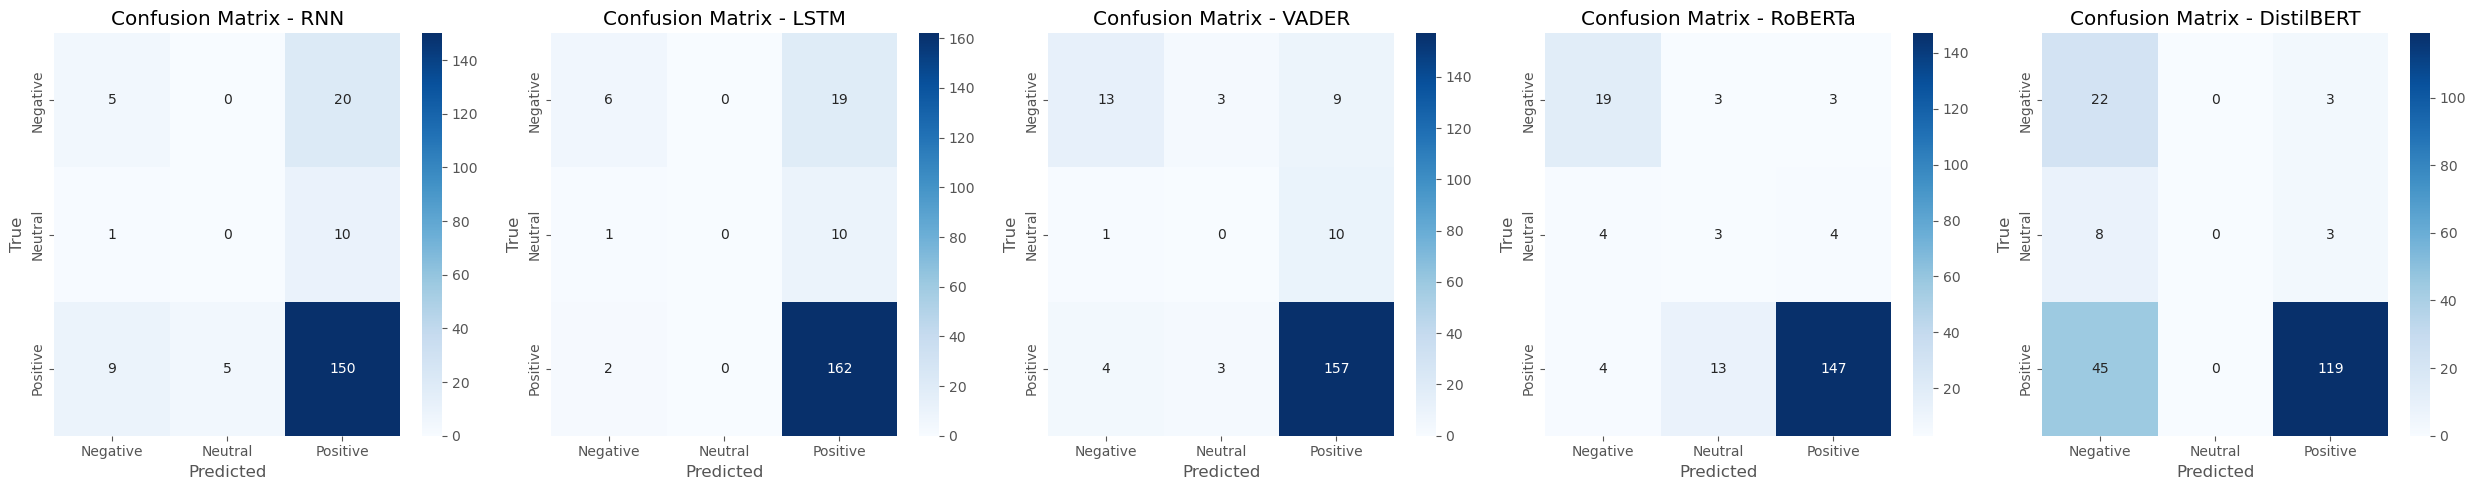

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Define class labels
class_labels = ['Negative', 'Neutral', 'Positive']

# Selected models
selected_models = ['RNN', 'LSTM', 'VADER', 'RoBERTa', 'DistilBERT']

# Plot confusion matrices for selected models
plt.figure(figsize=(25, 5))
for i, model_name in enumerate(selected_models, 1):
    # Get true labels and predictions
    y_true = le.inverse_transform(y_test_enc) if model_name in ['RNN', 'LSTM'] else y_test
    y_pred = ml_results[model_name]['predictions']
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    
    # Plot confusion matrix
    plt.subplot(1, 5, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Save results
results_df = pd.DataFrame({'Text': X_test, 'True_Sentiment': y_test})
results_df['Score'] = df.loc[X_test.index, 'Score']  # إضافة عمود Score
results_df['vader_pred'] = vader_pred
results_df['roberta_pred'] = roberta_pred
results_df['distilbert_pred'] = distilbert_pred
results_df['vader_pos'] = results_df['Text'].apply(lambda x: sid.polarity_scores(x)['pos'])
results_df['roberta_pos'] = results_df['Text'].apply(lambda x: roberta_pipeline(x[:512])[0]['score'] if 'positive' in roberta_pipeline(x[:512])[0]['label'].lower() else 0)
results_df.to_csv('sentiment_analysis_results.csv', index=False)

# Print example misclassifications
print("\nHighest RoBERTa positive score for Score=1:")
print(results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0])

print("\nHighest VADER positive score for Score=1:")
print(results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0])

print("\nHighest RoBERTa negative score for Score=5:")
print(results_df.query('Score == 5').sort_values('roberta_pos', ascending=False)['Text'].values[0])

# Test cases
test_texts = [
    'I love sentiment analysis!',
    'Make sure to like and subscribe!',
]

# Prepare data for RNN and LSTM
test_seq = tokenizer.texts_to_sequences(test_texts)
test_pad = pad_sequences(test_seq, maxlen=max_len)



print("\nVADER Test Cases:")
for text in test_texts:
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {vader_sentiment(text)}")

print("\nRoBERTa Test Cases:")
for text in test_texts:
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {roberta_sentiment(text)}")

print("\nDistilBERT Test Cases:")
for text in test_texts:
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {distilbert_sentiment(text)}")

print("\nRNN Test Cases:")
rnn_predictions = np.argmax(rnn_model.predict(test_pad, verbose=0), axis=1)
rnn_labels = le.inverse_transform(rnn_predictions)
for text, label in zip(test_texts, rnn_labels):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {label}")

print("\nLSTM Test Cases:")
lstm_predictions = np.argmax(lstm_model.predict(test_pad, verbose=0), axis=1)
lstm_labels = le.inverse_transform(lstm_predictions)
for text, label in zip(test_texts, lstm_labels):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {label}")


Highest RoBERTa positive score for Score=1:
I once loved these chips and they were the only chips i would buy.  I discovered them when I was in England back in 2000 and quickly became a fan.  About a year ago I picked up a bag that was on sale at my local supermarket.  I was finding it odd that they were on sale so much but took advantage of it.  After opening the bag I found the chips were not even close to the Kettle chips I was used to.  They were all uniform whitish yellow in color, flavor was way off, the lovely extra crisp brown chips were gone completely and I was very disappointed.  So I e-mailed Kettle with the following:  "What Happened? I bought this bag of chips the other day and they have a very different taste; It tastes "cheaper". I don't know how else to put it... I also noticed that the chips seemed to be less cooked as I did not see any of the browner colored chips that have the most flavor. I am hoping that nothing has changed with the ingredients or process used to

Model Performance Comparison:
              Model  Accuracy  Precision  Recall  F1 Score
Logistic Regression     0.820   0.672400   0.820  0.738901
                SVM     0.820   0.672400   0.820  0.738901
      Random Forest     0.820   0.672400   0.820  0.738901
                RNN     0.775   0.725000   0.775  0.746366
               LSTM     0.840   0.778831   0.840  0.792512
              VADER     0.850   0.821755   0.850  0.832876
            RoBERTa     0.845   0.879374   0.845  0.860459
         DistilBERT     0.705   0.817307   0.705  0.730294


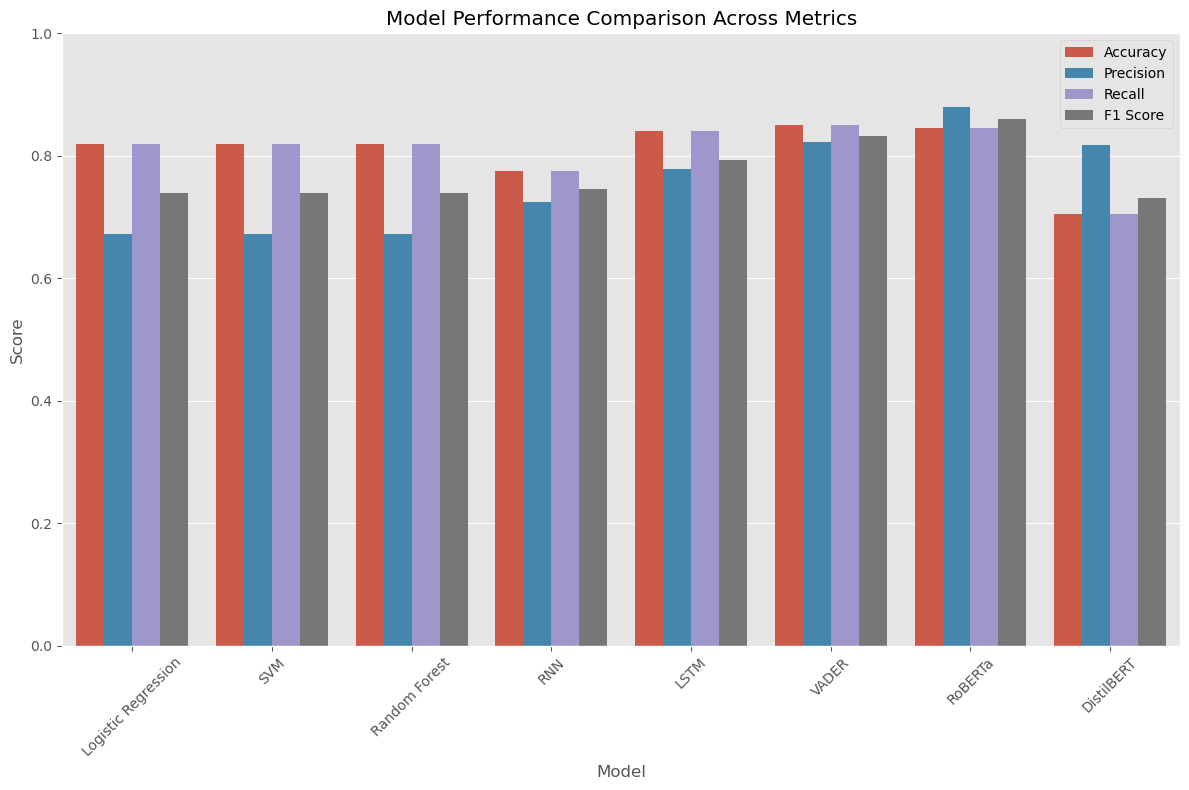

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compile model results into a DataFrame
model_names = list(ml_results.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
comparison_data = []

for model in model_names:
    # Check if the model has nested 'test_metrics' (for traditional ML models)
    if 'test_metrics' in ml_results[model]:
        metrics_dict = {
            'Model': model,
            'Accuracy': ml_results[model]['test_metrics']['accuracy'],
            'Precision': ml_results[model]['test_metrics']['precision'],
            'Recall': ml_results[model]['test_metrics']['recall'],
            'F1 Score': ml_results[model]['test_metrics']['f1']
        }
    else:
        # For RNN, LSTM, VADER, RoBERTa, DistilBERT with flat structure
        metrics_dict = {
            'Model': model,
            'Accuracy': ml_results[model]['accuracy'],
            'Precision': ml_results[model]['precision'],
            'Recall': ml_results[model]['recall'],
            'F1 Score': ml_results[model]['f1']
        }
    comparison_data.append(metrics_dict)

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display the comparison table
print("Model Performance Comparison:")
print(comparison_df.to_string(index=False))

# Plot the comparison
plt.figure(figsize=(12, 8))
comparison_df_melted = comparison_df.melt(id_vars='Model', 
                                        value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                                        var_name='Metric', value_name='Score')

sns.barplot(x='Model', y='Score', hue='Metric', data=comparison_df_melted)
plt.title('Model Performance Comparison Across Metrics')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc='best')
plt.tight_layout()

plt.show()